# The Landmarks of Lagos
___

The aim of this project is to build an application that can classify seven (7) popular architectural landmarks that can be found in Lagos state, Nigeria. These landmarks include

* Aro Meta Statue

    *   <img src="data/aro meta statue/lagosthreewisemenstatue0.jpeg" alt="aro meta" style="height: 300px; width:500px;"/> 

<br />

* Cathedral Church of Christ, Marina

    *   <img src="data/cathedral church marina/cathedralchurchmarina56.jpeg" alt="cathedral church of christ" style="height: 300px; width:500px;"/> 

<br />

* Civic Center & Towers Lagos

    *   <img src="data/civic center lagos/civiccenterlagos13.jpeg" alt="Civic Centre" style="height: 300px; width:500px;"/> 


<br />

* Lekki-Ikoyi Link Bridge

    *   <img src="data/lekki ikoyi bridge/lekkiikoyibridge0.png" alt="link bridge" style="height: 300px; width:500px;"/> 

<br />

* National theatre lagos

    *   <img src="data/national theatre lagos/nationaltheatrelagos1.jpeg" alt="national theatre" style="height: 300px; width:500px;"/> 

<br />

* Necom house lagos

    *   <img src="data/necom house lagos/necomhouselagos6.jpeg" alt="necom" style="height: 300px; width:500px;"/> 

<br />

* Tafawa Balewa Square (TBS)

    *   <img src="data/tafawa balewa square/necombuildinglagos75.jpeg" alt="tbs" style="height: 300px; width:500px;"/> 

___
The data was scraped using the [Google Image Scraper](https://github.com/ohyicong/Google-Image-Scraper) tool to extract all the images from Google


### Import libraries


In [2]:
from tensorflow import keras #deep learning framework
from tensorflow.keras import layers
import numpy as np

import PIL #library to display pictures
import cv2 #library that'll convert image to tensor
import pathlib # library to access directory

Import the data

In [4]:
# load the data
directory = pathlib.Path("data/") # dir holding data
directory

PosixPath('data')

In [5]:
len(list(directory.glob("*/*"))) # list total number of files in dir

898

In [6]:
necom = list(directory.glob("necom house lagos/*")) #dir holding necom images
necom[:10]

[PosixPath('data/necom house lagos/necomhouselagos3.jpeg'),
 PosixPath('data/necom house lagos/necomhouselagos39.jpeg'),
 PosixPath('data/necom house lagos/necombuildinglagos52.jpeg'),
 PosixPath('data/necom house lagos/necomhouselagos67.jpeg'),
 PosixPath('data/necom house lagos/necomhouselagos43.jpeg'),
 PosixPath('data/necom house lagos/necombuildinglagos5.jpeg'),
 PosixPath('data/necom house lagos/necombuildinglagos11.jpeg'),
 PosixPath('data/necom house lagos/necombuildinglagos116.webp'),
 PosixPath('data/necom house lagos/necomhouselagos20.jpeg'),
 PosixPath('data/necom house lagos/necombuildinglagos122.jpeg')]

Display Image

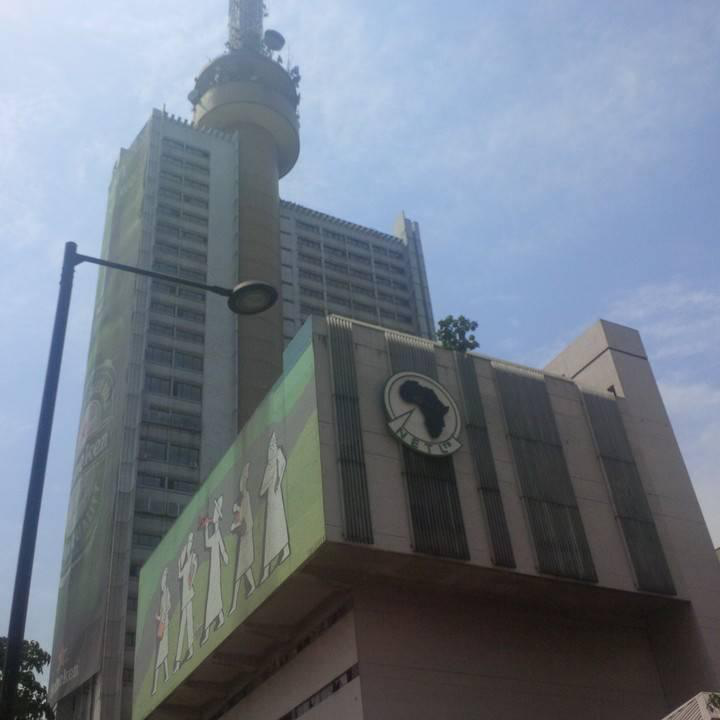

In [7]:
PIL.Image.open(str(necom[0])) #displaying Image

### Data Preprocessing

Folder and Label Handling

In [9]:
# Storing image folders in a dictionary
landmark_images = {
    "aro meta statue" : list(directory.glob("aro meta statue/*")),
    "cathedral church marina" : list(directory.glob("cathedral church marina/*")),
    "civic center lagos" : list(directory.glob("civic center lagos/*")),
    "lekki ikoyi bridge" : list(directory.glob("lekki ikoyi bridge/*")),
    "national theatre lagos" : list(directory.glob("national theatre lagos/*")),
    "necom house lagos" : list(directory.glob("necom house lagos/*")),
    # "nike art gallery" : list(directory.glob("nike art gallery/*")),
    "tafawa balewa square" : list(directory.glob("tafawa balewa square/*")),
}

In [10]:
# creating and storing labels for each class
landmark_labels = {
    "aro meta statue" : 0,
    "cathedral church marina" : 1,
    "civic center lagos" : 2,
    "lekki ikoyi bridge" : 3,
    "national theatre lagos" : 4,
    "necom house lagos" : 5,
    "tafawa balewa square" : 6,
    # "nike art gallery" : 7,
}

converting images to tensors

In [11]:
X, y = [], [] # initializing X, y data in lists
null = []

for cap_name, images in landmark_images.items():
    for image in images:
        img = cv2.imread(str(image)) # get path of image
        try:
            img = cv2.resize(img, (224, 224)) # convert into tensor of 224 * 224 pixels
            X.append(img) # store tensor in X data
            y.append(landmark_labels[cap_name]) # store label in y data
        except:
            null.append(img) # if image is corrupted remove                    

In [12]:
X = np.array(X) # convert tensors into numpy array
y = np.array(y)

Data Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=511, stratify=y, test_size=0.2)

In [15]:
X_train.shape, X_test.shape

((516, 224, 224, 3), (144, 224, 224, 3), (58, 224, 224, 3))

Normalize data /Scaling

In [16]:
X_train = X_train / 255
X_test = X_test / 255

One-Hot encoding y_values

In [17]:
from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

### Model Building

Data Augmentation: To Avoid Overfitting and Create More Images that may improve perfomance

In [18]:
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

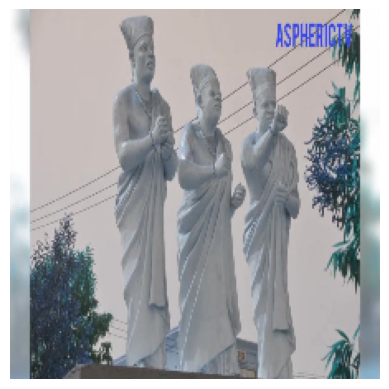

In [19]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(X[2])

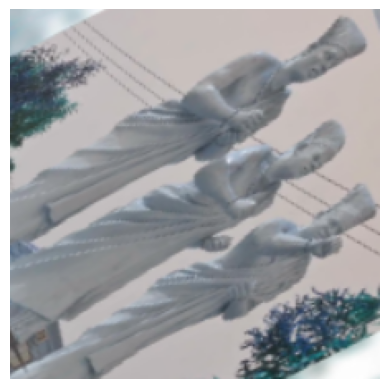

In [20]:
plt.axis("off")
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

### Transfer learning

In [21]:
import tensorflow_hub as hub #library to access pretrained models
import tensorflow as tf
from tensorflow import keras

Inception V3 Pretrained model

In [33]:
inception = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

87910968/87910968 [==============================] - 5s 0us/step


In [34]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

Fine-tuning layers to avoid overfitting and increase validation performance

In [35]:
for layer in inception.layers[:100]: # removing some layers used for prediction
    layer.trainable = False


In [36]:
i = layers.Input(shape=(224, 224, 3))

x = data_augmentation(i)
x = inception(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(7, activation="softmax")(x)

model = keras.models.Model(i, x)

model.compile(loss="categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
17/17 [==============================] - 37s 262ms/step - loss: 1.5407 - accuracy: 0.4593
Epoch 2/10
17/17 [==============================] - 3s 149ms/step - loss: 0.7714 - accuracy: 0.7578
Epoch 3/10
17/17 [==============================] - 3s 150ms/step - loss: 0.4047 - accuracy: 0.9050
Epoch 4/10
17/17 [==============================] - 3s 150ms/step - loss: 0.3069 - accuracy: 0.9167
Epoch 5/10
17/17 [==============================] - 3s 155ms/step - loss: 0.1814 - accuracy: 0.9612
Epoch 6/10
17/17 [==============================] - 3s 152ms/step - loss: 0.1778 - accuracy: 0.9516
Epoch 7/10
17/17 [==============================] - 3s 152ms/step - loss: 0.0868 - accuracy: 0.9845
Epoch 8/10
17/17 [==============================] - 3s 152ms/step - loss: 0.0999 - accuracy: 0.9729
Epoch 9/10
17/17 [==============================] - 3s 151ms/step - loss: 0.0636 - accuracy: 0.9864
Epoch 10/10
17/17 [==============================] - 3s 154ms/step - loss: 0.1277 - accuracy: 0.963

In [37]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 3s 378ms/step - loss: 0.1967 - accuracy: 0.9722


[0.1967218816280365, 0.9722222089767456]

In [38]:
yt = [value.argmax() for value in y_test]

In [39]:
predictions = model.predict(X_test)
predictions = [value.argmax() for value in predictions]

5/5 [==============================] - 2s 83ms/step


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

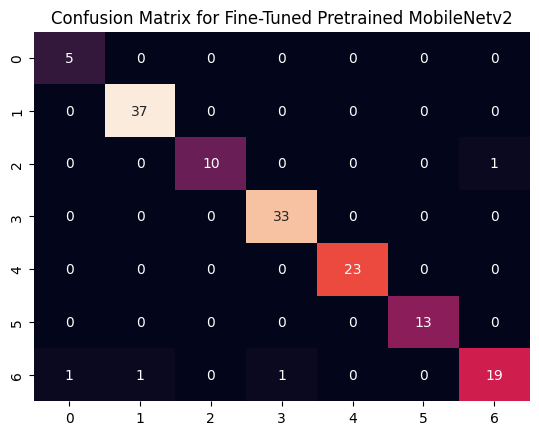

In [41]:
plt.title("Confusion Matrix for Fine-Tuned Pretrained InceptionV3")
sns.heatmap(confusion_matrix(yt, predictions), annot=True, cbar=False);

Test Prediction

In [42]:
pred = list(directory.glob("test/*"))
pred

[PosixPath('data/test/g,ufluivui.jpeg'), PosixPath('data/test/images.jpeg')]

In [43]:
def predict(image):
    
    img = cv2.imread(str(pred[image]))
    img = cv2.resize(img, (224, 224))

    test = np.array(img)
    test = test / 255

    x = np.reshape(test, (1, 224, 224, 3))
    x = model.predict(x)
    prediction = x.argmax() 
    probabilty = x[0].max() * 100
    return prediction, probabilty

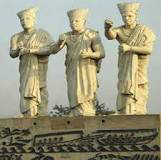

In [44]:
PIL.Image.open(str(pred[1]))

In [45]:
predict(1)

1/1 [==============================] - 1s 774ms/step


(0, 99.84936714172363)

In [46]:
# model.save("final_model.h5")